# Preprocessing and splitting the mimic dataset

## Load the data


#### todos: 
 - investigate encodings of differing variable types, for MICE
 - verify encoding of target is acceptable (or change to 0/1 if needed)

In [2]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold

In [3]:
data = pd.read_csv('mimic_full_union.csv')

In [4]:
data.shape

(30238, 50)

In [5]:
missing_val = [-7, -8, -9]
data = data.replace(missing_val, np.nan)

In [8]:
data.isnull().sum()

preiculos                   6
age                         0
gcs_min                    11
mechvent                    0
urineoutput                 0
heartrate_min               0
heartrate_max               0
meanbp_min                  1
meanbp_max                  1
resprate_min               30
resprate_max               30
tempc_min                 577
tempc_max                 577
sysbp_min                  24
sysbp_max                  24
bun_min                   126
bun_max                   126
wbc_min                   282
wbc_max                   282
potassium_min              98
potassium_max              98
sodium_min                128
sodium_max                128
bicarbonate_min           283
bicarbonate_max           283
bilirubin_min           16982
bilirubin_max           16982
hematocrit_min            115
hematocrit_max            115
creatinine_min            119
creatinine_max            119
albumin_min             19181
albumin_max             19181
glucose_ma

array([[<Axes: title={'center': 'preiculos'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gcs_min'}>,
        <Axes: title={'center': 'mechvent'}>,
        <Axes: title={'center': 'urineoutput'}>,
        <Axes: title={'center': 'heartrate_min'}>,
        <Axes: title={'center': 'heartrate_max'}>,
        <Axes: title={'center': 'meanbp_min'}>,
        <Axes: title={'center': 'meanbp_max'}>,
        <Axes: title={'center': 'resprate_min'}>],
       [<Axes: title={'center': 'resprate_max'}>,
        <Axes: title={'center': 'tempc_min'}>,
        <Axes: title={'center': 'tempc_max'}>,
        <Axes: title={'center': 'sysbp_min'}>,
        <Axes: title={'center': 'sysbp_max'}>,
        <Axes: title={'center': 'bun_min'}>,
        <Axes: title={'center': 'bun_max'}>,
        <Axes: title={'center': 'wbc_min'}>,
        <Axes: title={'center': 'wbc_max'}>,
        <Axes: title={'center': 'potassium_min'}>],
       [<Axes: title={'center': 'potassium_max'}>,
  

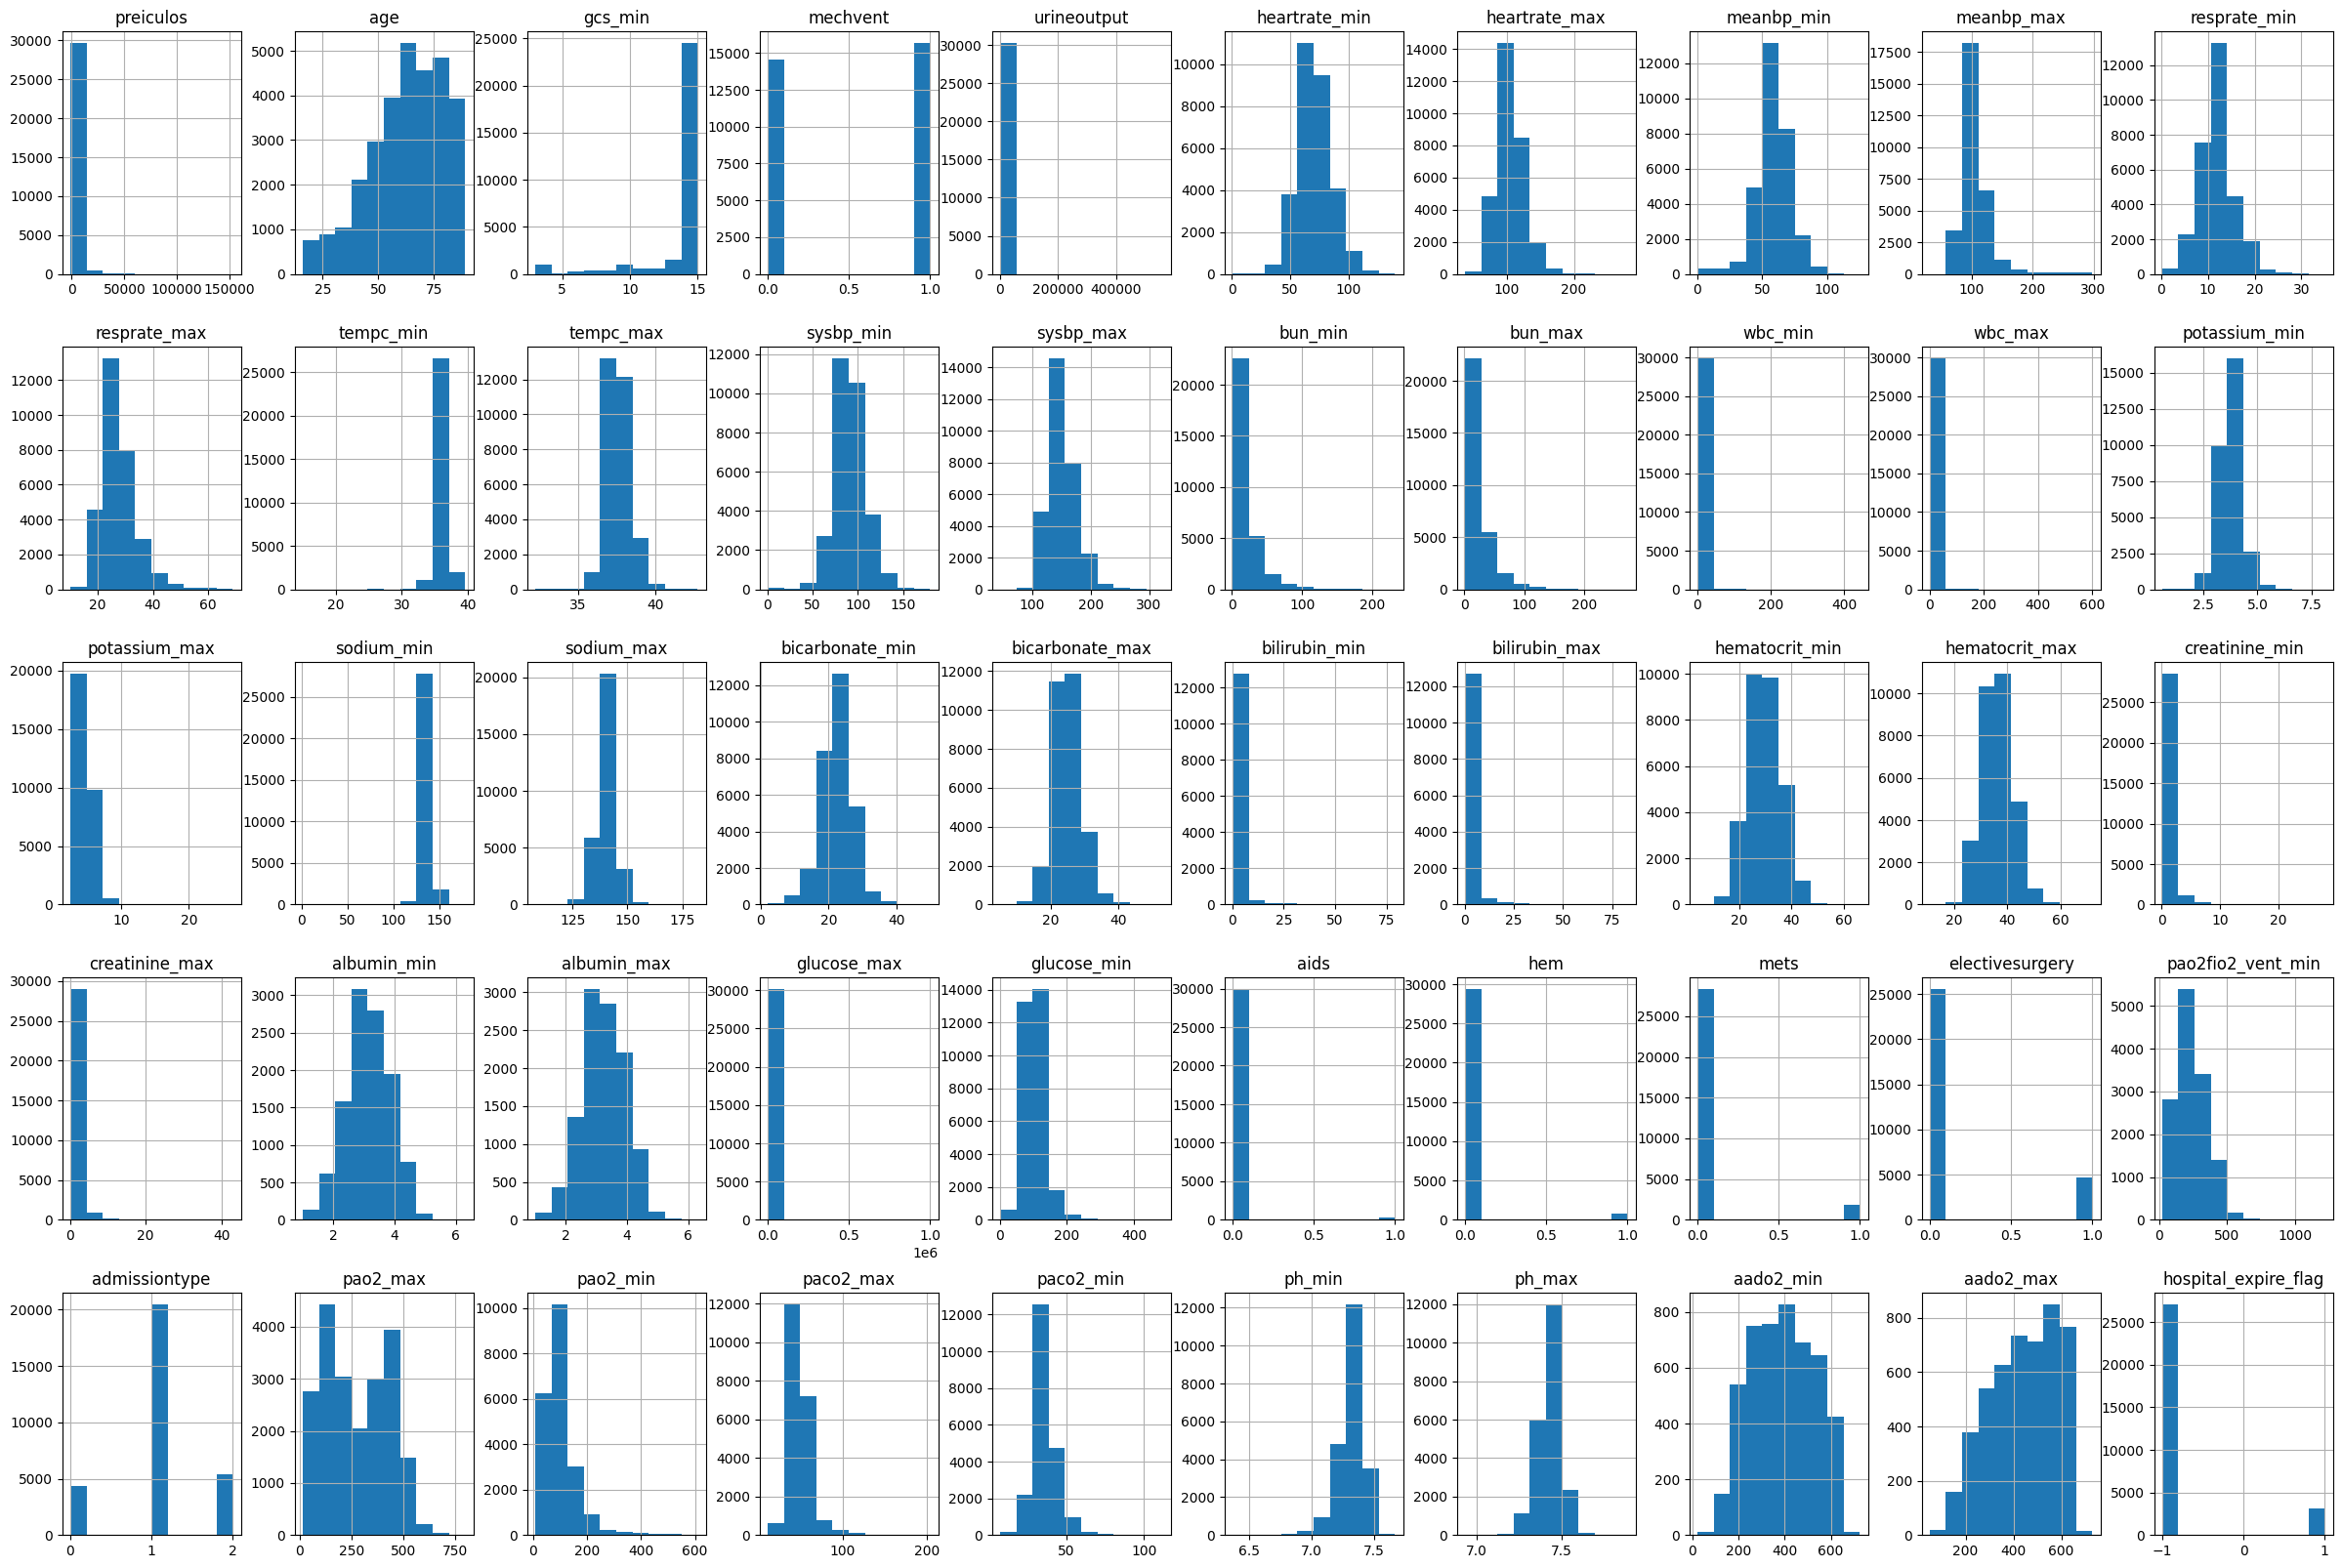

In [9]:
data.hist(figsize=(30, 20), layout=(5, 10))

array([[<Axes: title={'center': 'tempc_min'}>,
        <Axes: title={'center': 'tempc_max'}>,
        <Axes: title={'center': 'bilirubin_min'}>,
        <Axes: title={'center': 'bilirubin_max'}>],
       [<Axes: title={'center': 'albumin_min'}>,
        <Axes: title={'center': 'albumin_max'}>,
        <Axes: title={'center': 'pao2fio2_vent_min'}>,
        <Axes: title={'center': 'pao2_max'}>],
       [<Axes: title={'center': 'pao2_min'}>,
        <Axes: title={'center': 'paco2_max'}>,
        <Axes: title={'center': 'paco2_min'}>,
        <Axes: title={'center': 'ph_min'}>],
       [<Axes: title={'center': 'ph_max'}>,
        <Axes: title={'center': 'aado2_min'}>,
        <Axes: title={'center': 'aado2_max'}>, <Axes: >]], dtype=object)

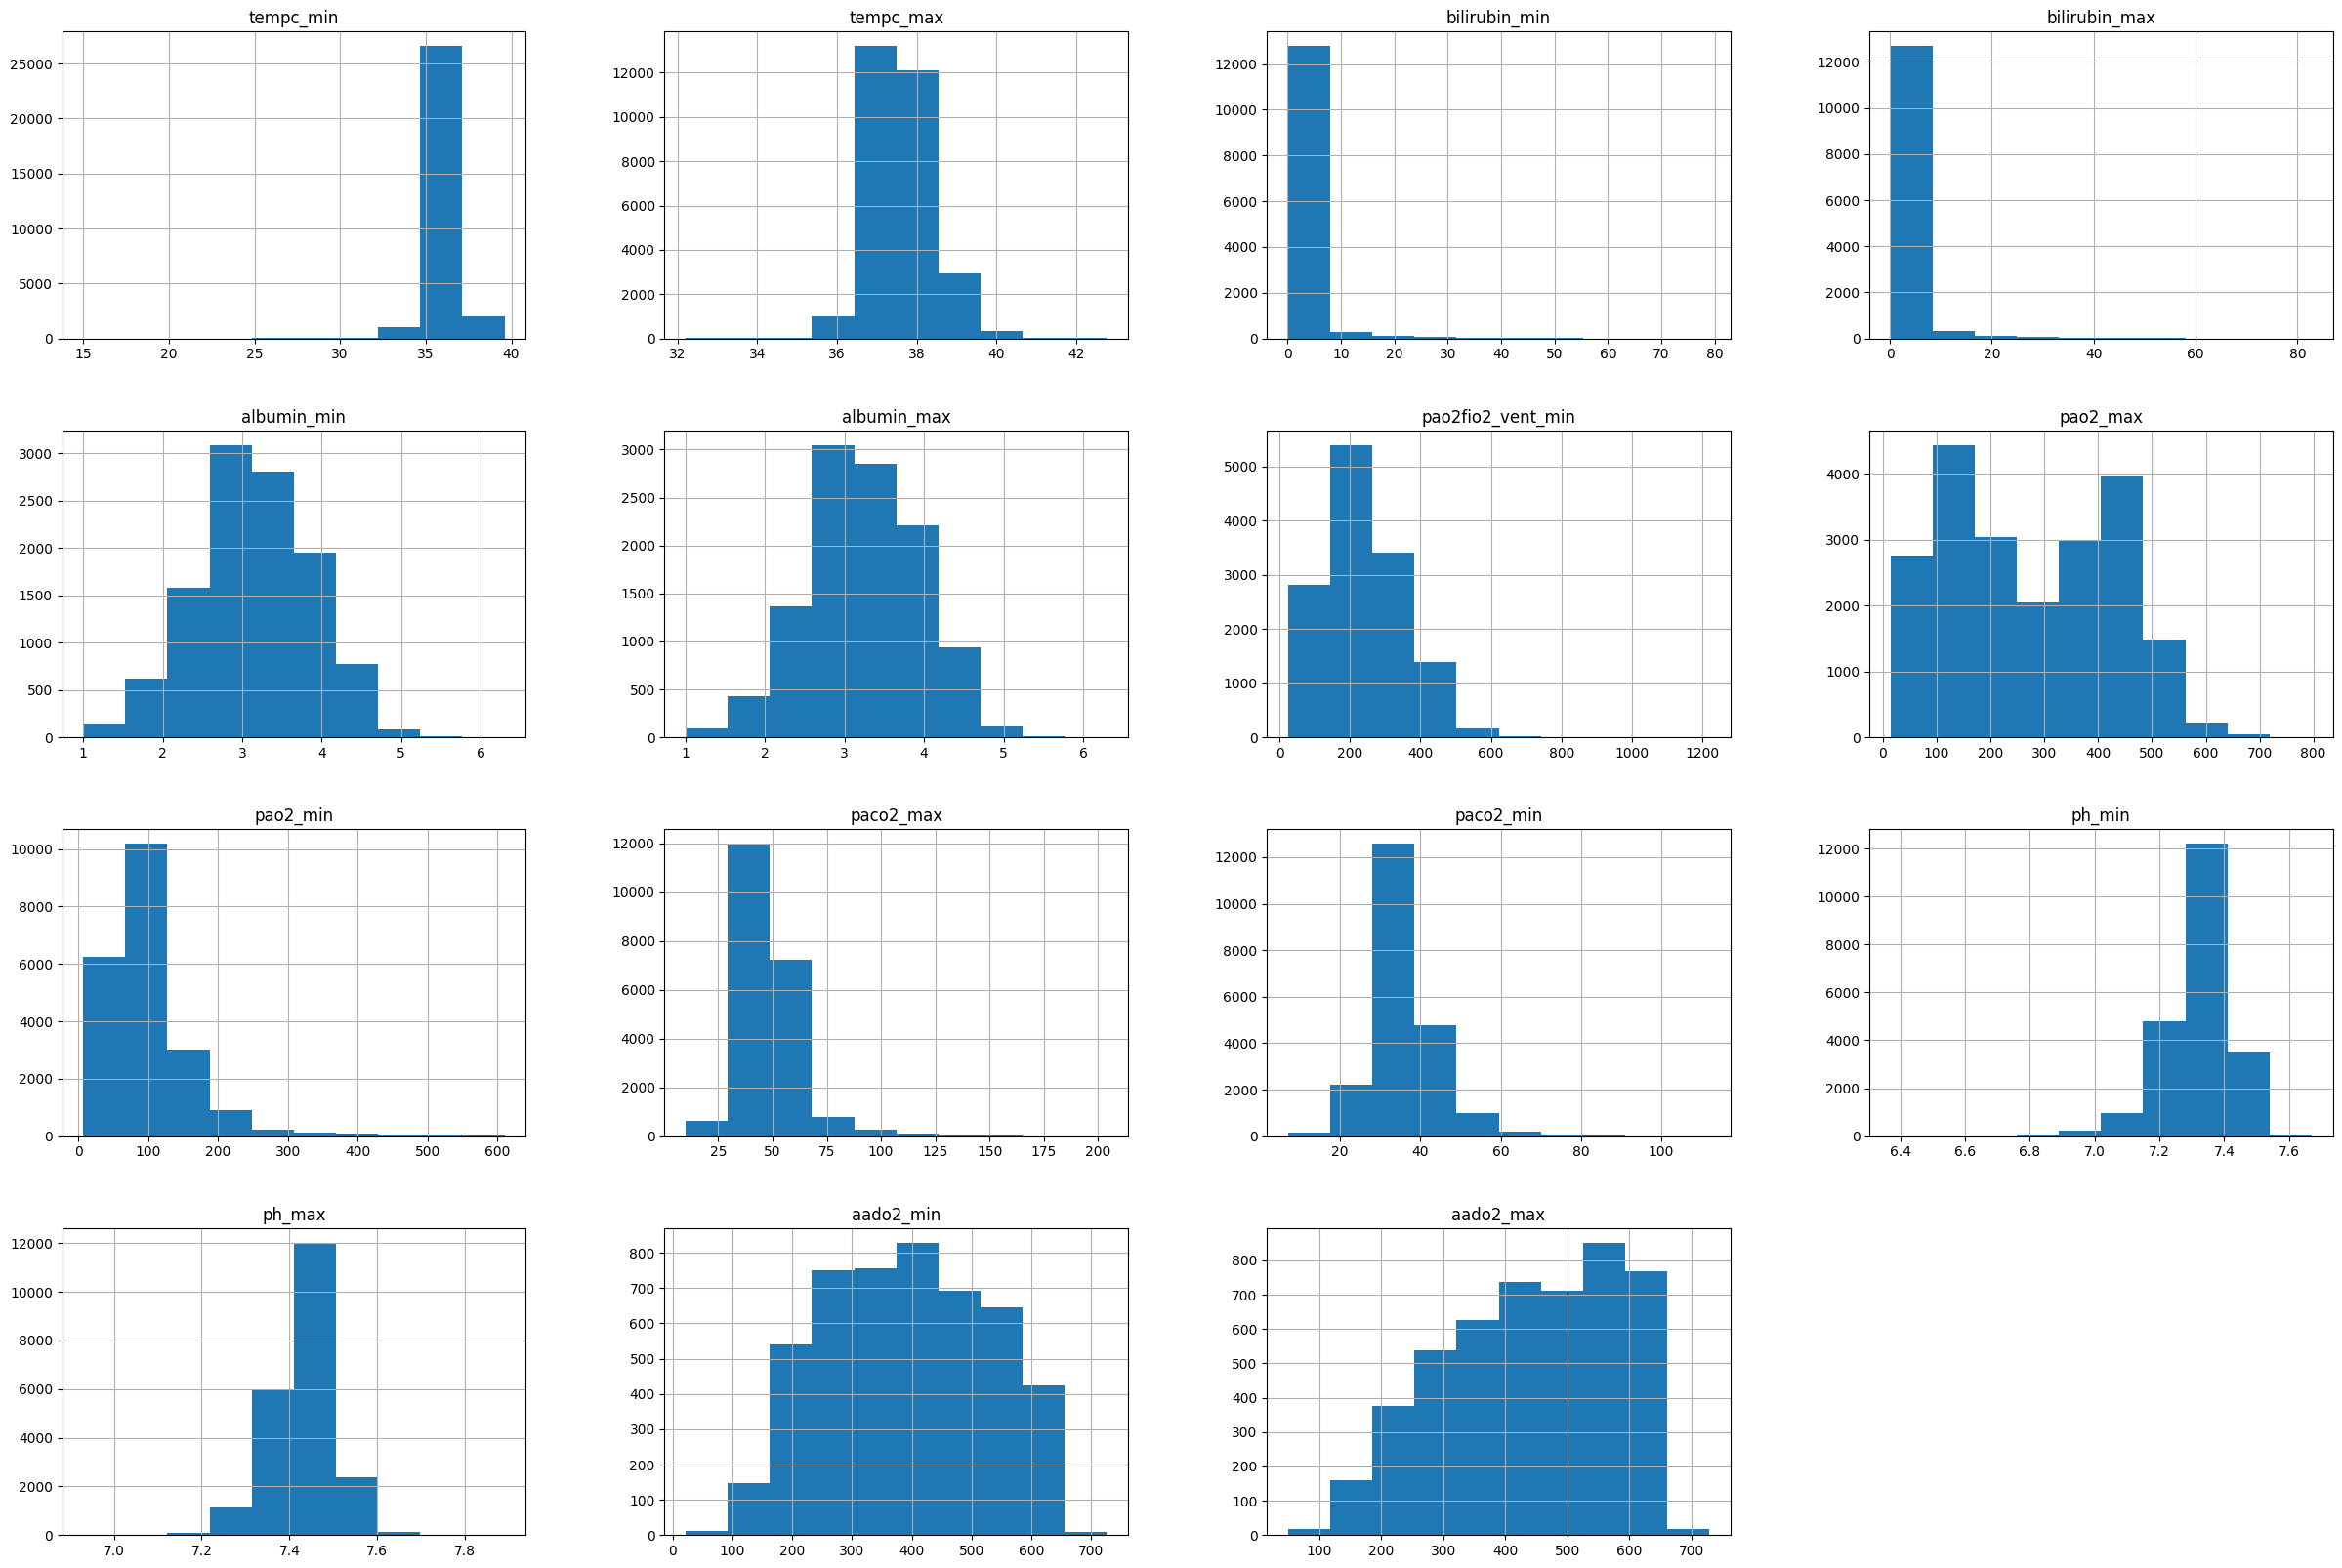

In [17]:
data[data.columns[data.isnull().sum()>0.01*len(data)]].hist(figsize=(30, 20))

In [21]:
data.loc[data['hospital_expire_flag']==-1, 'hospital_expire_flag'] = 0

### Create training, validation and holdout sets

In [23]:
outdir = Path('.')
outdir.mkdir(exist_ok=True)

n_splits = 10
n_folds = 5
idx = np.arange(len(data))

kf_splits = KFold(n_splits=n_splits, random_state=1896, shuffle=True)

for holdout_num, out_split in enumerate(kf_splits.split(idx)):
    idx_train = idx[out_split[0]]
    idx_test = idx[out_split[1]]
    devel_fold = data.iloc[idx_train, ]
    test_fold = data.iloc[idx_test, ]

    test_fold.to_csv(outdir / f'holdout_{holdout_num}.csv', index=False)

    kf_folds = KFold(n_splits=n_folds, random_state=165782 * holdout_num, shuffle=True)
    idx_folds = np.arange(len(devel_fold))
    for fold_num, idx_fold_split in enumerate(kf_folds.split(idx_folds)):
        train_fold = devel_fold.iloc[idx_fold_split[0]]
        val_fold = devel_fold.iloc[idx_fold_split[1]]
        train_fold.to_csv(outdir / f'devel_{holdout_num}_train_{fold_num}.csv', index=False)
        val_fold.to_csv(outdir / f'devel_{holdout_num}_val_{fold_num}.csv', index=False)